In [1]:
from etabstopython import EtabsModel
from IPython.display import display as display_table


In [2]:


# Código de unidades (ejemplo: 12 = N-cm)
units = 12

# Crear e instanciar el modelo
model = EtabsModel(units=units , name='PRY TEST001 POST PUCE')

# Mostrar resumen
model.summary()


✅ Connected to ETABS.
📏 Units set to 12.
✅ Loaded Story Definitions: 26 stories.
📐 Computed accumulated floor heights: [  0.    4.7   8.4  12.1  15.8  19.5  23.2  26.9  30.6  34.3  38.   41.7
  45.4  51.9  55.6  59.3  63.   66.7  70.4  74.1  77.8  81.5  85.2  88.9
  92.6  96.3 100. ]
✅ Loaded Point Object Connectivity: 1055 connections.
✅ Loaded Frame Section Property Definitions: 8 properties.
✅ Loaded Frame Section Property Definitions - Concrete Rectangular: 8 properties.
✅ Loaded Frame Assignments - Section Properties: 1052 properties.
✅ Loaded Beam Object Connectivity: 744 entries.
✅ Loaded Column Object Connectivity: 232 entries.
✅ Loaded Brace Object Connectivity: 76 entries.
✅ Combined linear elements: 1052 total.
✅ Loaded Wall Object Connectivity: 156 entries.
✅ Loaded Floor Object Connectivity: 52 entries.
✅ Processed floor point groups by story: 25 levels.
📐 Assigned dimensions to 8 frame sections.
✅ Assigned colors to 5 frame sections.
✅ Loaded Element Forces - Columns: 661

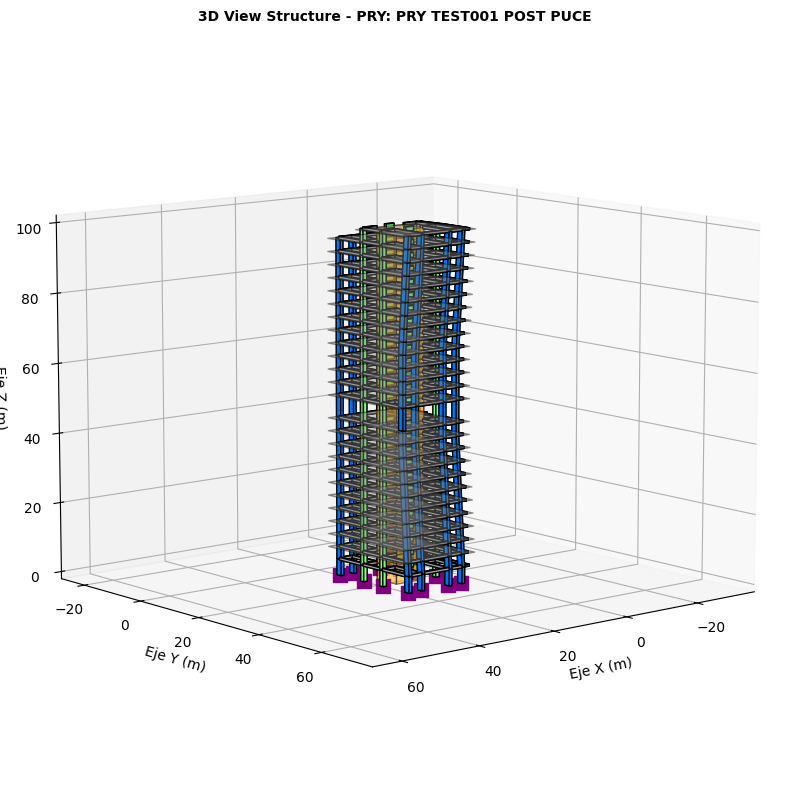

In [3]:
from etabstopython.plotter import plot_structure_3d
plot_structure_3d(model)